<!-- This cell is automatically updated by tools/tutorial-cell-updater.py -->
<!-- The contents are initialized from tutorials/notebook-header.md -->

[<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>](https://colab.research.google.com/github/speechbrain/speechbrain/blob/develop/docs/tutorials/basics/what-can-i-do-with-speechbrain.ipynb)
to execute or view/download this notebook on
[GitHub](https://github.com/speechbrain/speechbrain/tree/develop/docs/tutorials/basics/what-can-i-do-with-speechbrain.ipynb)

# **What can I do with SpeechBrain?**

SpeechBrain can already do a lot of cool things. You can use SpeechBrain for the following types of problems:

- **speech classification** (many-to-one, e.g. speaker-id)
- **speech regression** (speech-to-speech mapping, e.g, speech enhancement)
- **sequence-to-sequence** (speech to speech mapping, e.g., speech recognition)

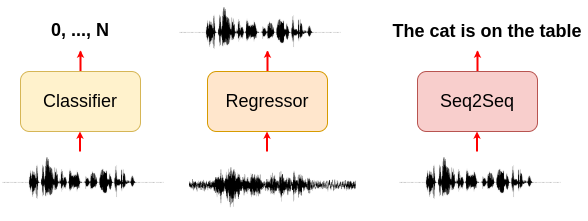

More precisely, SpeechBrain supports many Conversational AI tasks ([see our README](https://github.com/speechbrain/speechbrain/?tab=readme-ov-file#-supported-technologies)). See also all the different tutorials.

For all these tasks, we provide recipes that allow users training a model from scratch. We make pre-trained models and logs for our experiments available.

The usual way to train your model from scratch with SpeechBrain is the following:

```bash
cd recipe/dataset_name/task_name
python train.py train.yaml --data_folder=/path/to/the/dataset
```
Please, refer to the aforementioned tutorial for more information about training.



 In this brief tutorial, we just show how to use some of the pre-trained models made available on [HuggingFace](https://huggingface.co/speechbrain/). First of all, let's install SpeechBrain:

In [1]:
%%capture
# Installing SpeechBrain via pip
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH

In [2]:
%%capture
%cd /content
!wget -O example_mandarin.wav "https://www.dropbox.com/scl/fi/7jn7jg9ea2u6d9d70657z/example_mandarin.wav?rlkey=eh220qallihxp9yppm2kx7a2i&dl=1"
!wget -O example_rw.mp3 "https://www.dropbox.com/scl/fi/iplkymn8c8mbc6oclxem3/example_rw.mp3?rlkey=yhmqfsn8q43pmvd1uvjo3yl0s&dl=1"
!wget -O example_whamr.wav "https://www.dropbox.com/scl/fi/gxbtbf3c3hxr0y9dbf0nw/example_whamr.wav?rlkey=1wt5d49kjl36h0zypwrmsy8nz&dl=1"
!wget -O example-fr.wav "https://www.dropbox.com/scl/fi/vjn98vu8e3i2mvsw17msh/example-fr.wav?rlkey=vabmu4fgqp60oken8aosg75i0&dl=1"
!wget -O example-it.wav "https://www.dropbox.com/scl/fi/o3t7j53s7czaob8yq73rz/example-it.wav?rlkey=x9u6bkbcp6lh3602fb9uai5h3&dl=1"
!wget -O example.wav "https://www.dropbox.com/scl/fi/uws97livpeta7rowb7q7g/example.wav?rlkey=swppq2so15jibmpmihenrktbt&dl=1"
!wget -O example1.wav "https://www.dropbox.com/scl/fi/mu1tdejny4cbgxczwm944/example1.wav?rlkey=8pi7hjz15syvav80u1xzfbfhn&dl=1"
!wget -O example2.flac "https://www.dropbox.com/scl/fi/k9ouk6ec1q1fkevamodrn/example2.flac?rlkey=vtbyc6bzp9hknzvn9rb63z3yf&dl=1"
!wget -O test_mixture.wav "https://www.dropbox.com/scl/fi/4327g66ajs8aq3dck0fzn/test_mixture.wav?rlkey=bjdcw3msxw3armpelxuayug5i&dl=1"

Once installed, you should be able to import the speechbrain project with python:

In [ ]:
import speechbrain as sb
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

## Speech Recognition on Different Languages

### English

In [ ]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="pretrained_models/asr-crdnn-rnnlm-librispeech")
asr_model.transcribe_file('/content/example.wav')

In [ ]:
signal = read_audio("/content/example.wav").squeeze()
Audio(signal, rate=16000)

### French

In [ ]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-fr", savedir="pretrained_models/asr-crdnn-commonvoice-fr")
asr_model.transcribe_file("/content/example-fr.wav")

In [ ]:
signal = read_audio("/content/example-fr.wav").squeeze()
Audio(signal, rate=44100)

### Italian

In [ ]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-it", savedir="pretrained_models/asr-crdnn-commonvoice-it")
asr_model.transcribe_file("/content/example-it.wav")

In [ ]:
signal = read_audio("/content/example-it.wav").squeeze()
Audio(signal, rate=16000)

### Mandarin

In [3]:
from speechbrain.inference.interfaces import foreign_class

asr_model = foreign_class(source="speechbrain/asr-wav2vec2-ctc-aishell",  pymodule_file="custom_interface.py", classname="CustomEncoderDecoderASR")
asr_model.transcribe_file("/content/example_mandarin.wav")

hyperparams.yaml:   0%|          | 0.00/2.30k [00:00<?, ?B/s]

custom_interface.py:   0%|          | 0.00/4.82k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.26k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at TencentGameMate/chinese-wav2vec2-large and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

wav2vec2.ckpt:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/99.3M [00:00<?, ?B/s]

['她', '应', '该', '也', '是', '喜', '欢']

In [ ]:
signal = read_audio("/content/example_mandarin.wav").squeeze()
Audio(signal, rate=16000)

### Kinyarwanda

In [ ]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-wav2vec2-commonvoice-rw", savedir="pretrained_models/asr-wav2vec2-commonvoice-rw")
asr_model.transcribe_file("/content/example_rw.mp3")

In [ ]:
signal = read_audio("/content/example_rw.mp3").squeeze()
Audio(signal, rate=44100)

## Speech Separation

We here show a mixture with 2 speakers, but we have a state-of-the-art system for separating mixture with 3 speakers as well. We also have models that deals witj noise and reverberation. [See your HuggingFace repository](https://huggingface.co/speechbrain/)

In [ ]:
from speechbrain.inference.separation import SepformerSeparation as separator

model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
est_sources = model.separate_file(path='/content/test_mixture.wav')

In [ ]:
signal = read_audio("/content/test_mixture.wav").squeeze()
Audio(signal, rate=8000)

In [ ]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)

In [ ]:
Audio(est_sources[:, :, 1].detach().cpu().squeeze(), rate=8000)

## Speech Enhancement
The goal of speech enhancement is to remove the noise that affects a recording.
Speechbrain has several systems for speech enhancement. In the following, you can find an example processed by the SepFormer (the version trained to perform enhancement):

In [ ]:
from speechbrain.inference.separation import SepformerSeparation as separator
import torchaudio

model = separator.from_hparams(source="speechbrain/sepformer-whamr-enhancement", savedir='pretrained_models/sepformer-whamr-enhancement4')
enhanced_speech = model.separate_file(path='/content/example_whamr.wav')


In [ ]:
signal = read_audio("/content/example_whamr.wav").squeeze()
Audio(signal, rate=8000)

In [ ]:
Audio(enhanced_speech[:, :].detach().cpu().squeeze(), rate=8000)

## Speaker Verification
The task here is to determine whether two sentences belong to the same speaker or not.

In [ ]:
from speechbrain.inference.speaker import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("/content/example1.wav", "/content/example2.flac")

print(prediction, score)

In [ ]:
signal = read_audio("/content/example1.wav").squeeze()
Audio(signal, rate=16000)

In [ ]:
signal = read_audio("/content/example2.flac").squeeze()
Audio(signal, rate=16000)

## Speech Synthesis (Text-to-Speech)
The goal of speech synthesis is to create a speech signal from the input text.
If the following you can find an example with the popular [Tacotron2](https://arxiv.org/abs/1712.05884) model coupled with [HiFiGAN](https://arxiv.org/abs/2010.05646) as a vocoder:

In [ ]:
import torchaudio
from speechbrain.inference.TTS import Tacotron2
from speechbrain.inference.vocoders import HIFIGAN

# Initialize TTS (tacotron2) and Vocoder (HiFIGAN)
tacotron2 = Tacotron2.from_hparams(source="speechbrain/tts-tacotron2-ljspeech", savedir="tmpdir_tts")
hifi_gan = HIFIGAN.from_hparams(source="speechbrain/tts-hifigan-ljspeech", savedir="tmpdir_vocoder")

# Running the TTS
mel_output, mel_length, alignment = tacotron2.encode_text("This is an open-source toolkit for the development of speech technologies.")

# Running Vocoder (spectrogram-to-waveform)
waveforms = hifi_gan.decode_batch(mel_output)

In [ ]:
Audio(waveforms.detach().cpu().squeeze(), rate=22050)

## Citing SpeechBrain

If you use SpeechBrain in your research or business, please cite it using the following BibTeX entry:

```bibtex
@misc{speechbrainV1,
  title={Open-Source Conversational AI with {SpeechBrain} 1.0},
  author={Mirco Ravanelli and Titouan Parcollet and Adel Moumen and Sylvain de Langen and Cem Subakan and Peter Plantinga and Yingzhi Wang and Pooneh Mousavi and Luca Della Libera and Artem Ploujnikov and Francesco Paissan and Davide Borra and Salah Zaiem and Zeyu Zhao and Shucong Zhang and Georgios Karakasidis and Sung-Lin Yeh and Pierre Champion and Aku Rouhe and Rudolf Braun and Florian Mai and Juan Zuluaga-Gomez and Seyed Mahed Mousavi and Andreas Nautsch and Xuechen Liu and Sangeet Sagar and Jarod Duret and Salima Mdhaffar and Gaelle Laperriere and Mickael Rouvier and Renato De Mori and Yannick Esteve},
  year={2024},
  eprint={2407.00463},
  archivePrefix={arXiv},
  primaryClass={cs.LG},
  url={https://arxiv.org/abs/2407.00463},
}
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```